<a href="https://colab.research.google.com/github/HwangHanJae/recommender_system/blob/main/inflearn_recsys/surprise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Surprise 패키지 설치

In [1]:
!pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 KB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp38-cp38-linux_x86_64.whl size=3366454 sha256=9f194a096af46e9835e2943dfc4094659f17c6d91764d568a1bd0f04dd9bd55d
  Stored in directory: /root/.cache/pip/wheels/af/db/86/2c18183a80ba05da35bf0fb7417aac5cddbd93bcb1b92fd3ea
Successfully built scikit-surprise


# 필요 라이브러리 로드

In [2]:
import numpy as np

from surprise import BaselineOnly, KNNWithMeans, SVD, SVDpp, Dataset, accuracy, Reader
from surprise.model_selection import cross_validate, train_test_split

data =Dataset.load_builtin(name='ml-100k')

Dataset ml-100k could not be found. Do you want to download it? [Y/n] y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


In [3]:
# train test 분리
trainset, testset =train_test_split(data, test_size = 0.25)

## 간단한 테스트

In [6]:
algo = KNNWithMeans()

algo.fit(trainset)

predictions = algo.test(testset)

accuracy.rmse(predictions)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9492


0.9491690117531271

# Surprise 알고리즘 비교

- BaselineOnly : 사용자의 평점 평균과 아이템의 평점 평균을 모델화 하여 예측하는 알고리즘

- KNNWithMeans : 사용자의 평가 경향을 고려한 협업필터링

- SVD : MF기반 알고리즘, 내부적으로는 SGD와 유사하게 구현

- SVDpp : 일종의 암묵적 평가까지 포함한 알고리즘

In [7]:
# 비교에 필요한 Surpirse 알고리즘
from surprise import BaselineOnly
from surprise import KNNWithMeans
from surprise import SVD
from surprise import SVDpp

# 정확도 측정 관련 모듈
from surprise import accuracy

# Dataset 관련 모듈
from surprise import Dataset

# train/test set 분리 관련 모듈
from surprise.model_selection import train_test_split

# 결과를 그래프로 표시하기 위한 라이브러리
import matplotlib.pyplot as plt

data = Dataset.load_builtin(name=u'ml-100k')

trainset, testset = train_test_split(data, test_size=0.25)

Estimating biases using als...
RMSE: 0.9469
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9537
RMSE: 0.9380
RMSE: 0.9229


array([0.92291399, 0.93795221, 0.94690839, 0.9537031 ])

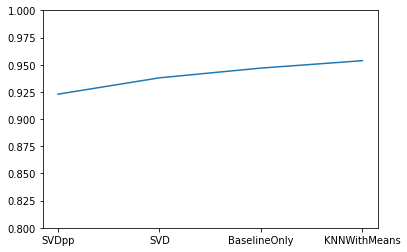

In [8]:
algorithms = [BaselineOnly, KNNWithMeans, SVD, SVDpp]
names = []
results = []

for option in algorithms:
  algo = option()
  names.append(option.__name__)
  algo.fit(trainset)
  predictions = algo.test(testset)
  results.append(accuracy.rmse(predictions))


names = np.array(names)
results = np.array(results)
index = np.argsort(results)

plt.ylim(0.8, 1)
plt.plot(names[index], results[index])
results[index]

# 알고리즘 옵션 지정

In [9]:
sim_options = {'name' : 'pearson_baseline',
               "user_bised" : True}
algo = KNNWithMeans(k=30, sim_options = sim_options) 
algo.fit(trainset)
predictions = algo.test(testset)              
accuracy.rmse(predictions)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9440


0.9439685639813271

# 다양한 조건의 비교

In [11]:
# 집단과 사용자의 평가경향을 함께 고려한 CF 알고리즘
from surprise import KNNWithMeans

# Dataset 관련 모듈
from surprise import Dataset

# 정확도 측정 관련 모듈
from surprise import accuracy

# train/test set 분리 관련 모듈
from surprise.model_selection import train_test_split

data = Dataset.load_builtin(name=u'ml-100k')

# Train/Test 0.75 : 0.25 분리
trainset, testset = train_test_split(data, test_size=0.25)

result = []
for neighbor_size in [10,20,30,40,50,60]:
  algo = KNNWithMeans(k = neighbor_size,
                      sim_options = {'name': 'pearson_baseline',
                                     'user_based' : True})
  algo.fit(trainset)
  predictions = algo.test(testset)
  result.append([neighbor_size, accuracy.rmse(predictions)])

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9532
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9416
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9397
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9393
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9396
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9398


In [12]:
result

[[10, 0.9532464799189561],
 [20, 0.9416033970790326],
 [30, 0.9397299530616977],
 [40, 0.9393147663127355],
 [50, 0.9396241887288386],
 [60, 0.9398449050521807]]

In [13]:
# KNN 다양한 파라미터 비교
# Grid Search를 위한 모듈
from surprise.model_selection import GridSearchCV

param_grid = {
    'k' : [5,10,15,25],
    'sim_options' : {
        'name' : ['pearson_baseline', 'cosine'],
        'user_based' : [True, False]
    }

}
gs = GridSearchCV(KNNWithMeans,
                  param_grid,
                  measures = ['rmse'],
                  cv=4)

gs.fit(data)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similar

In [14]:
#최적 RMSE출력
print(gs.best_score['rmse'])

#최적 RMSE의 parameter 출력
print(gs.best_params['rmse'])

0.9258370274634039
{'k': 25, 'sim_options': {'name': 'pearson_baseline', 'user_based': False}}


In [ ]:
# SVD 다양한 파라미터 비교
from surprise import SVD
from surprise.model_selection import GridSearchCV


param_grid ={
    'n_epochs' : [70, 80, 90],
    'lr_all' : [0.005, 0.006, 0.007],
    'reg_all' : [0.06, 0.07, 0.1]
}

gs = GridSearchCV(algo_class = SVD,
                  param_grid = param_grid,
                  measures = ['rmse'],
                  cv=4)

gs.fit(data)

print(gs.best_score['rmse'])

print(gs.best_params['rmse'])